In [0]:
import tensorflow.compat.v1 as tf
import numpy as np
import matplotlib.pyplot as plt
%config IntilineBackend.figure_format = 'svg'
tf.compat.v1.disable_eager_execution()

In [0]:
(x_train,y_train),(x_test,y_test)= tf.keras.datasets.mnist.load_data()

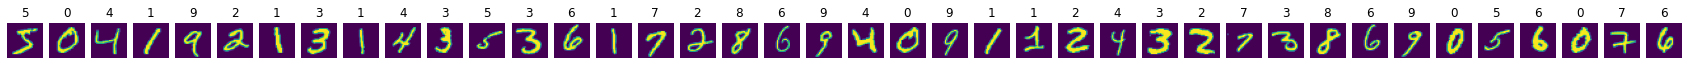

In [39]:
fig,axes= plt.subplots(1,40, figsize=(30,20))
for img,label,ax in zip(x_train[:40],y_train[:40],axes):
  ax.set_title(label)
  ax.imshow(img)
  ax.axis('off')
plt.show()

In [40]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [0]:
#doing some preprocessing
#flatteinig all images and scale them from 0-1
x_train= x_train.reshape(60000,784)/255
x_test= x_test.reshape(10000,784)/255


In [0]:
#now we will change the shape of labels too !
#right now the labels look something like and array of [5,1,4,5......6,3,4] definig the actual digits itself
#but we will reshape it such that, for each image we have an binary array of 10 elements
# so for a '5' , the array will be [0,0,0,0,1,0,0,0,0,0] -> called as a 'one hot array'
with tf.Session() as sesh:
  y_train=sesh.run(tf.one_hot(y_train,10))
  y_test=sesh.run(tf.one_hot(y_test,10))

In [43]:
y_train[:4] 

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
#hyper parameters
learning_rate= 0.01
epochs= 50
batch_size= 100
batches = int(x_train.shape[0]/batch_size)

In [0]:
X= tf.placeholder(tf.float32, [None,784])
Y= tf.placeholder(tf.float32, [None,10])

W= tf.Variable(0.1*np.random.randn(784,10).astype(np.float32))
B= tf.Variable(0.1*np.random.randn(1,10).astype(np.float32))

In [0]:
pred = tf.nn.softmax(tf.add(tf.matmul(X,W),B)) #matmul is matrix multiplication
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(pred),axis=1))
optimizer= tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

epoch = 0 and cost = 0.8112429
epoch = 1 and cost = 0.6127056
epoch = 2 and cost = 0.52989495
epoch = 3 and cost = 0.48296613
epoch = 4 and cost = 0.4523719
epoch = 5 and cost = 0.43070102
epoch = 6 and cost = 0.41447315
epoch = 7 and cost = 0.40182334
epoch = 8 and cost = 0.39165717
epoch = 9 and cost = 0.383288
epoch = 10 and cost = 0.3762621
epoch = 11 and cost = 0.37026742
epoch = 12 and cost = 0.36508188
epoch = 13 and cost = 0.36054316
epoch = 14 and cost = 0.3565301
epoch = 15 and cost = 0.35295
epoch = 16 and cost = 0.349731
epoch = 17 and cost = 0.3468161
epoch = 18 and cost = 0.34416026
epoch = 19 and cost = 0.34172687
epoch = 20 and cost = 0.33948582
epoch = 21 and cost = 0.33741242
epoch = 22 and cost = 0.335486
epoch = 23 and cost = 0.33368933
epoch = 24 and cost = 0.33200768
epoch = 25 and cost = 0.33042866
epoch = 26 and cost = 0.32894146
epoch = 27 and cost = 0.32753688
epoch = 28 and cost = 0.3262069
epoch = 29 and cost = 0.32494447
epoch = 30 and cost = 0.32374352
epo

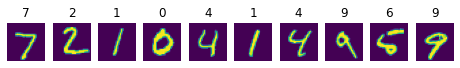

In [60]:
offset=0
with tf.Session() as sesh:
  sesh.run(tf.global_variables_initializer())

  for epoch in range(epochs):
    for i in range(batches):
      x= x_train[offset: offset+batch_size]
      y= y_train[offset: offset+batch_size]
      sesh.run(optimizer, feed_dict={X:x, Y:y})
      c=sesh.run(cost,feed_dict={X:x,Y:y})
      offset= offset+batch_size
    print("epoch = "+ str(epoch) +" and cost = " + str(c))
    offset=0
  correct_pred = tf.equal(tf.argmax(pred,1),tf.argmax(Y,1))
  accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32))
  acc= accuracy.eval({X:x_test, Y:y_test})
  print(acc) 

  fig,axes = plt.subplots(1,10,figsize=(8,4))
  for img, ax in zip(x_test[0:10],axes):
    guess = np. argmax(sesh.run(pred, feed_dict={X:[img]}))
    ax.set_title(guess)
    ax.imshow(img.reshape((28,28)))
    ax.axis('off')